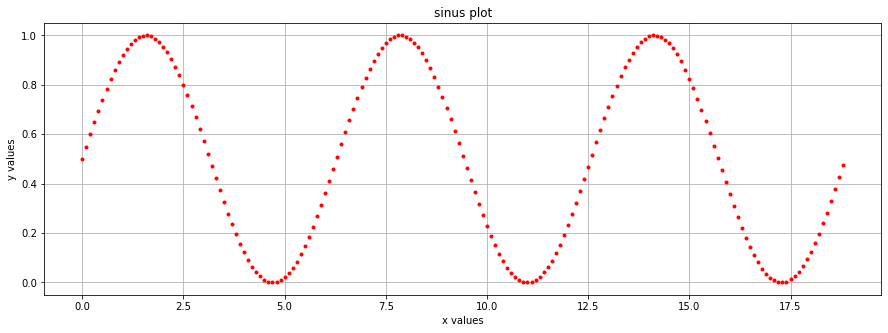

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

#values1=np.array([0,0])

#num_of_points=200

#for x in range(num_of_points + 1):
#    b1=20*np.random.rand()
#    #values[b1]=np.sin(b1)
#    values1=np.vstack([values1, np.array([b1, (np.sin(b1)+1)/2])])

#values1=np.delete(values1,(0), axis=0)
#X, Y = values1[1:,0], values1[1:,1]
#print(X)

X = np.arange(0, np.pi*6, .1)
Y = (np.sin(X)+1)/2 

plt.figure(figsize=(15,5))

#plt.plot(values.keys(), values.values(), '.', color='blue')
plt.plot(X, Y, '.', color='red')

plt.xlabel('x values')
plt.ylabel('y values')
plt.title('sinus plot')
plt.grid(True)
plt.show()

In [9]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv1D
from keras.utils import plot_model
#import numpy as np
from sklearn.preprocessing import minmax_scale
from keras import regularizers

# задаем для воспроизводимости результатов
np.random.seed(2)

# создаем модели, добавляем слои один за другим
model = Sequential()
#model.add(Dense(120, activation='tanh', input_dim=1)) # входной слой требует задать input_dim
#model.add(Dense(120, activation='tanh', activity_regularizer=regularizers.l2(0.01)))
#model.add(Dense(120, activation='tanh', activity_regularizer=regularizers.l2(0.01)))
#model.add(Dense(120, activation='tanh', activity_regularizer=regularizers.l2(0.01)))
#model.add(BatchNormalization())
#model.add(Conv1D(12,2,activation='relu',input_shape=X.shape))
model.add(Dense(1, activation='elu'))

# компилируем модель, используем градиентный спуск adam
#model.compile(loss="mse", optimizer="adam", metrics=['mse', 'mae', 'mape', 'cosine'])
model.compile(loss="mse", optimizer="adam", metrics=['mse'])

# обучаем нейронную сеть
history = model.fit(X, Y, epochs = 200, batch_size=2, validation_split=0.0, verbose=0)

#plot_model(model)

# оцениваем результат
scores = model.evaluate(X, Y)
accuracy_percent = 1 - np.sqrt(scores[1])
print("\n%s: %.2f%% %.2f%%" % (model.metrics_names[1], scores[1]*100, accuracy_percent))

plt.plot(history.history['mean_squared_error'])
#plt.plot(history.history['mean_absolute_error'])
plt.show()

#predictions1= model.predict(X)
#predictions2= model.predict(Y)
#print(len(predictions2))

#predictions3=model.predict_on_batch(X)
#predictions3=minmax_scale(predictions3)

#predictions2=minmax_scale(predictions2)


X_new = np.arange(0, np.pi*16, .1)
pred_Y=model.predict(X_new)
pred_Y=minmax_scale(pred_Y)

#print(pred_Y)

plt.figure(figsize=(15,5))
plt.plot(X, Y, '.', color='blue')
#plt.plot(X, predictions2, '.', color='red')
plt.plot(X_new, pred_Y, '.', color='green')

plt.xlabel('x values')
plt.ylabel('y values')
plt.title('sinus plot')
plt.grid(True)
plt.show()

ValueError: Input 0 is incompatible with layer dense_16: expected min_ndim=2, found ndim=1